In [8]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np 
import gzip 
import struct
import os
os.chdir("C:/Users/jade1/Desktop")

def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    
train_images = read_idx('C:/Users/jade1/Desktop/train-images-idx3-ubyte.gz')
train_labels = read_idx('C:/Users/jade1/Desktop/train-labels-idx1-ubyte.gz')

test_images = read_idx('C:/Users/jade1/Desktop/t10k-images-idx3-ubyte.gz')
test_labels = read_idx('C:/Users/jade1/Desktop/t10k-labels-idx1-ubyte.gz')

print('Training Images Shape:', train_images.shape)
print('Training Labels Shape:', train_labels.shape)
print('Test Images Shape:', test_images.shape)
print('Test Labels Shape:', test_labels.shape)

Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


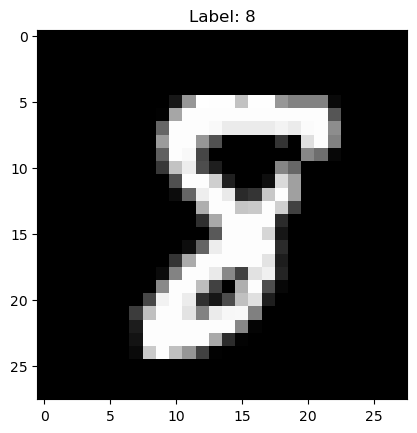

Normalized Train Images Shape: (60000, 28, 28)
One-Hot Encoded Train Labels Shape: (60000, 10)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Choose a random index
random_index = random.randint(0, len(train_images) - 1)

# Extract the corresponding image and label
image = train_images[random_index]
label = train_labels[random_index]

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

# Normalize pixel values
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# One-hot encode labels
def one_hot_encode(labels):
    n_labels = len(labels)
    n_classes = 10  # MNIST has 10 classes (0 to 9)
    one_hot = np.eye(n_classes)[labels]
    return one_hot

train_labels_one_hot = one_hot_encode(train_labels)
test_labels_one_hot = one_hot_encode(test_labels)

# Check the results
print("Normalized Train Images Shape:", train_images_normalized.shape)
print("One-Hot Encoded Train Labels Shape:", train_labels_one_hot.shape)



In [20]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Change units and activation based on your problem type

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [26]:
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 1600)              0         
                                                                 
 dense_27 (Dense)            (None, 64)              

C:\Users\jade1\anaconda3\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



1875/1875 [==============================] - 17s 8ms/step - loss: 0.2825 - accuracy: 0.9461 - val_loss: 0.0720 - val_accuracy: 0.9771
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0646 - accuracy: 0.9801 - val_loss: 0.0679 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0521 - val_accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.0563 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0344 - accuracy: 0.9901 - val_loss: 0.0632 - val_accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0628 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.0619 - val_accuracy: 0.

313/313 - 1s - loss: 0.0715 - accuracy: 0.9851 - 1s/epoch - 4ms/step


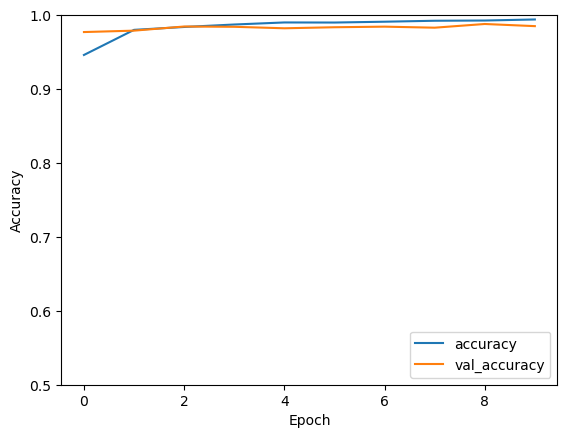

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [28]:
print(test_acc)


0.9850999712944031


In [2]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np 
import gzip 
import struct
import os
os.chdir("C:/Users/jade1/Desktop")

def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    
train_images = read_idx('C:/Users/jade1/Desktop/train-images-idx3-ubyte.gz')
train_labels = read_idx('C:/Users/jade1/Desktop/train-labels-idx1-ubyte.gz')

test_images = read_idx('C:/Users/jade1/Desktop/t10k-images-idx3-ubyte.gz')
test_labels = read_idx('C:/Users/jade1/Desktop/t10k-labels-idx1-ubyte.gz')

print('Training Images Shape:', train_images.shape)
print('Training Labels Shape:', train_labels.shape)
print('Test Images Shape:', test_images.shape)
print('Test Labels Shape:', test_labels.shape)

Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


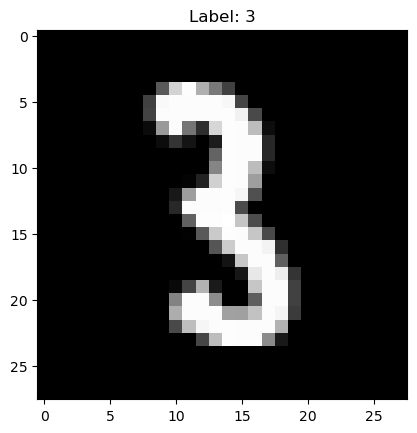

Normalized Train Images Shape: (60000, 28, 28)
One-Hot Encoded Train Labels Shape: (60000, 10)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
# Choose a random index
random_index = random.randint(0, len(train_images) - 1)

# Extract the corresponding image and label
image = train_images[random_index]
label = train_labels[random_index]

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

# Normalize pixel values
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# One-hot encode labels
def one_hot_encode(labels):
    n_labels = len(labels)
    n_classes = 10  # MNIST has 10 classes (0 to 9)
    one_hot = np.eye(n_classes)[labels]
    return one_hot

train_labels_one_hot = one_hot_encode(train_labels)
test_labels_one_hot = one_hot_encode(test_labels)

# Check the results
print("Normalized Train Images Shape:", train_images_normalized.shape)
print("One-Hot Encoded Train Labels Shape:", train_labels_one_hot.shape)

In [7]:
import keras
from keras import layers
from keras import optimizers
from keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(128, input_shape=(train_images.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()



model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                

313/313 - 13s - loss: 2.3010 - accuracy: 0.1135 - 13s/epoch - 41ms/step


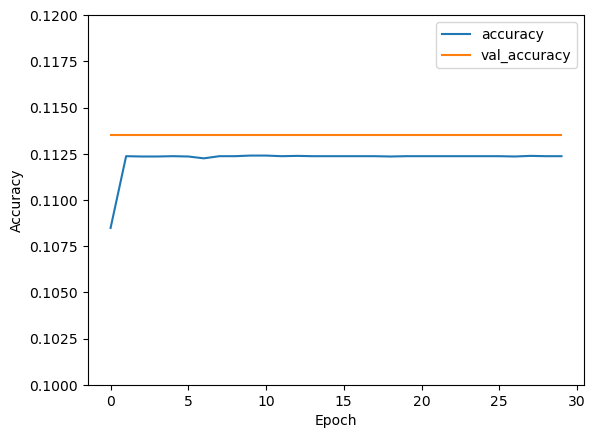

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.12])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)



In [9]:
print(test_acc)


0.11349999904632568


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam

!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import gzip 
import struct
import os
os.chdir("C:/Users/jade1/Desktop")

def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    
train_images = read_idx('C:/Users/jade1/Desktop/train-images-idx3-ubyte.gz')
train_labels = read_idx('C:/Users/jade1/Desktop/train-labels-idx1-ubyte.gz')

test_images = read_idx('C:/Users/jade1/Desktop/t10k-images-idx3-ubyte.gz')
test_labels = read_idx('C:/Users/jade1/Desktop/t10k-labels-idx1-ubyte.gz')

print('Training Images Shape:', train_images.shape)
print('Training Labels Shape:', train_labels.shape)
print('Test Images Shape:', test_images.shape)
print('Test Labels Shape:', test_labels.shape)


Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


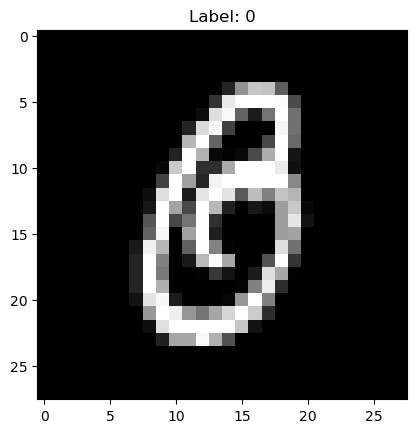

Normalized Train Images Shape: (60000, 28, 28)
One-Hot Encoded Train Labels Shape: (60000, 10)


In [3]:
import random

random_index = random.randint(0, len(train_images) - 1)

# Extract the corresponding image and label
image = train_images[random_index]
label = train_labels[random_index]

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

# Normalize pixel values
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# One-hot encode labels
def one_hot_encode(labels):
    n_labels = len(labels)
    n_classes = 10  # MNIST has 10 classes (0 to 9)
    one_hot = np.eye(n_classes)[labels]
    return one_hot

train_labels_one_hot = one_hot_encode(train_labels)
test_labels_one_hot = one_hot_encode(test_labels)

# Check the results
print("Normalized Train Images Shape:", train_images_normalized.shape)
print("One-Hot Encoded Train Labels Shape:", train_labels_one_hot.shape)


In [13]:
generator = Sequential()
generator.add(Dense(512,input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784))
generator.add(Reshape([28,28,1]))

generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               51712     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [15]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
discriminator = Sequential()
discriminator.add(Dense(1,input_shape=[28,28,1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 28, 28, 1)         2         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 128)              

In [18]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

GAN.compile(optimizer='adam',loss='binary_crossentropy')

GAN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 28, 28, 1)         320656    
                                                                 
 sequential_4 (Sequential)   (None, 1)                 242179    
                                                                 
Total params: 562835 (2.15 MB)
Trainable params: 318864 (1.22 MB)
Non-trainable params: 243971 (953.01 KB)
_________________________________________________________________


4/4 [==============================] - 0s 3ms/step


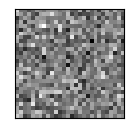

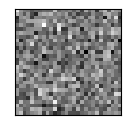

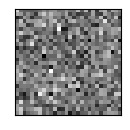

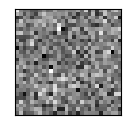

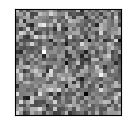

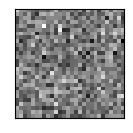

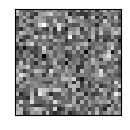

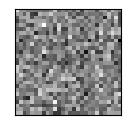

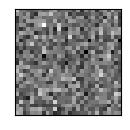

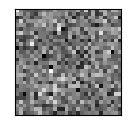

Training is complete


In [37]:
epochs = 30
batch_size = 100

real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_imgs = train_images[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_imgs, real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = GAN.train_on_batch(noise, real)

    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

            plt.tight_layout()
            plt.show()

        
        
print('Training is complete')

4/4 [==============================] - 0s 2ms/step


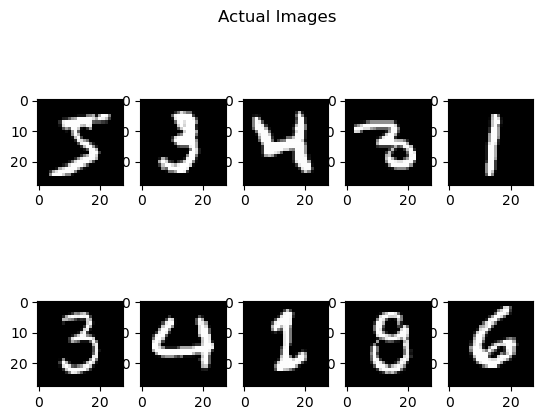

In [39]:
noise=np.random.normal(loc=0, scale=1, size=(100,noise_shape))

gen_image = generator.predict(noise)
fig,axe=plt.subplots(2,5)
fig.suptitle("Actual Images")
idx = 0
for i in range(2):
    for j in range(5):
        axe[i,j].imshow(train_images[idx].reshape(28,28),cmap='gray')
        idx+=10

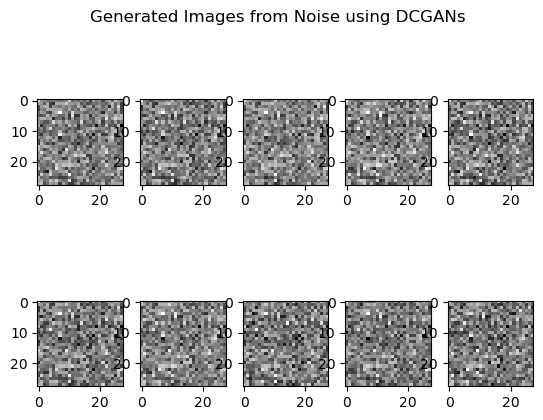

In [40]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using DCGANs')
idx=0
for i in range(2):
     for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=3